In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
data = []
model_name = "mixtral-instruct-q2"
test_list = [ i for i in range(10) ]
import os
folder = "test-results" 
all_files = []
for file in os.listdir(folder):
    if file.endswith(".json"):
        all_files.append(file)
match_files = []
for test in test_list:
    expected_file  = f"{model_name}-test-{test}.json"
    if expected_file in all_files:
        match_files.append(expected_file)
        with open( ("test-results/" + expected_file) , "r") as f:
            new_data = json.load(f)
            data.extend(new_data)

In [3]:
def time_parser(time_str):
    return round(time_str,2)

In [4]:
match_files

['mixtral-instruct-q2-test-1.json',
 'mixtral-instruct-q2-test-2.json',
 'mixtral-instruct-q2-test-3.json']

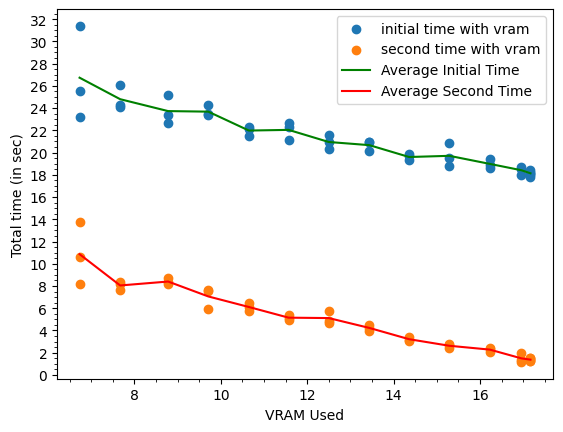

In [5]:
import matplotlib.ticker as ticker
from datetime import timedelta
fig, ax = plt.subplots()

# Extra for GPT

from collections import defaultdict


    # --------------------
# Group times by VRAM
sorted_layers = defaultdict(list)
sorted_layers2 = defaultdict(list)
for da in data:
    vram = da['total_vram']
    time = time_parser(da['init_total_time_1'])
    time2 = time_parser(da['total_time_2'])
    sorted_layers[vram].append(time)
    sorted_layers2[vram].append(time2)
    

# Calculate average time for each VRAM
average_times = {vram: sum(times) / len(times) for vram, times in sorted_layers.items()}
average_times2 = {vram: sum(times) / len(times) for vram, times in sorted_layers2.items()}
# Sort the average times by VRAM to ensure correct plotting order
sorted_layers = sorted(average_times.keys())
sorted_layers2 = sorted(average_times2.keys())
averages = [average_times[vram] for vram in sorted_layers]
average2 = [average_times2[vram] for vram in sorted_layers2]

# --------------------------------


x = [ da["total_vram"] for da in data]
y = [ da["gpu_layers"] for da in data]

x2 = x
y2 = [ time_parser(da["init_total_time_1"]) for da in data]

x3 = x
y3 = [ time_parser(da["total_time_2"]) for da in data]

# ax.plot(x, y, label="gpu layer to vram")
ax.scatter(x2, y2, label="initial time with vram")
ax.scatter(x3, y3, label="second time with vram")



ax.plot(sorted_layers, averages, label='Average Initial Time', color='green')
ax.plot(sorted_layers2, average2, label='Average Second Time', color='red')
# Some weird avg line for fun
# average_y2 = sum(y2) / len(y2)
# average_y3 = sum(y3) / len(y3)

# ax.axhline(y=average_y2, color='blue', linestyle='dashed', linewidth=2, label='Average Initial Time')
# ax.axhline(y=average_y3, color='orange', linestyle='dashed', linewidth=2, label='Average Second Time')


ax.xaxis.set_major_locator(ticker.AutoLocator()) 
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())


ax.set_xlabel("VRAM Used")
# ax.set_ylabel("GPU Layers")
# ax.set_xlabel("GPU Layers")
ax.set_ylabel("Total time (in sec)")

ax.legend()

plt.show()

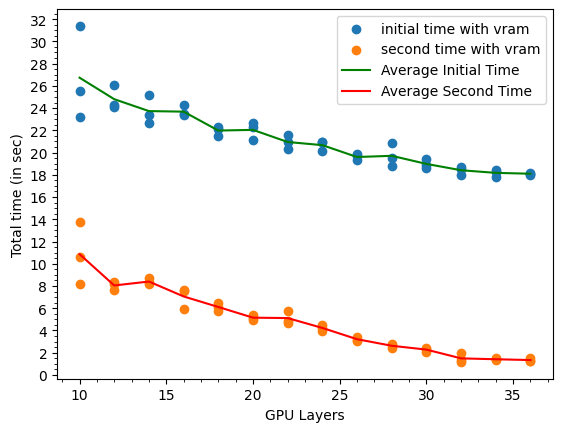

In [6]:
fig, ax = plt.subplots()

# Group times by GPU layers
times_by_gpu_layer = defaultdict(list)
times_by_gpu_layer2 = defaultdict(list)
for da in data:
    layer = da['gpu_layers']
    time = time_parser(da['init_total_time_1'])
    time2 = time_parser(da['total_time_2'])
    times_by_gpu_layer[layer].append(time)
    times_by_gpu_layer2[layer].append(time2)
    

# Calculate average time for each GPU layer
average_times = {layer: sum(times) / len(times) for layer, times in times_by_gpu_layer.items()}
average_times2 = {layer: sum(times) / len(times) for layer, times in times_by_gpu_layer2.items()}
# Sort the average times by GPU layer to ensure correct plotting order
sorted_layers = sorted(average_times.keys())
sorted_layers2 = sorted(average_times2.keys())
averages = [average_times[layer] for layer in sorted_layers]
average2 = [average_times2[layer] for layer in sorted_layers2]


x = [ da["total_vram"] for da in data]
y = [ da["gpu_layers"] for da in data]

x2 = y
y2 = [ time_parser(da["init_total_time_1"]) for da in data]

x3 = y
y3 = [ time_parser(da["total_time_2"]) for da in data]

# ax.plot(x, y, label="gpu layer to vram")
ax.scatter(x2, y2, label="initial time with vram")
ax.scatter(x3, y3, label="second time with vram")



ax.plot(sorted_layers, averages, label='Average Initial Time', color='green')
ax.plot(sorted_layers2, average2, label='Average Second Time', color='red')



ax.xaxis.set_major_locator(ticker.AutoLocator()) 
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())


# ax.set_xlabel("VRAM Used")
# ax.set_ylabel("GPU Layers")
ax.set_xlabel("GPU Layers")
ax.set_ylabel("Total time (in sec)")

ax.legend()

plt.show()

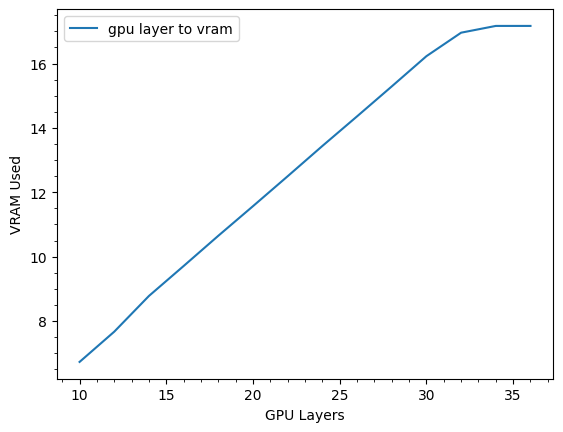

In [13]:
fig, ax = plt.subplots()

x = [da["gpu_layers"] for da in data]
y = [da["total_vram"] for da in data]

# Sort the x and y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

ax.plot(x_sorted, y_sorted, label="gpu layer to vram")

ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.set_xlabel("GPU Layers")
ax.set_ylabel("VRAM Used")

ax.legend()

plt.show()
